In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet
from sklearn.model_selection import train_test_split
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
!pip install openpyxl

/kaggle/input/outlier-detection/data_is_ready_for_machine.xlsx
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 456.7 kB/s eta 0:00:00


In [2]:
df = pd.read_excel("../input/outlier-detection/data_is_ready_for_machine.xlsx")
df

,date,time,epoch,mote id,temperature,humidity,light,voltage
0,2004-02-28,00:59:16.02785,3,1,19.9884,37.0933,45.08,2.69964
1,2004-02-28,01:03:16.33393,11,1,19.3024,38.4629,45.08,2.68742
2,2004-02-28,01:06:16.013453,17,1,19.1652,38.8039,45.08,2.68742
3,2004-02-28,01:06:46.778088,18,1,19.1750,38.8379,45.08,2.69964
4,2004-02-28,01:08:45.992524,22,1,19.1456,38.9401,45.08,2.68742
...,...,...,...,...,...,...,...,...
1048570,2004-03-06,09:32:33.116218,21189,27,24.3984,34.3273,250.24,2.65143
1048571,2004-03-06,09:33:08.057059,21190,27,24.4278,34.3273,250.24,2.65143
1048572,2004-03-06,09:33:33.38416,21191,27,24.4670,34.2577,250.24,2.65143
1048573,2004-03-06,09:34:02.63218,21192,27,24.5062,34.1880,250.24,2.65143


In [3]:
from sklearn.ensemble import IsolationForest

x = df[["temperature", "humidity", "light", "voltage"]]

iforest = IsolationForest(n_estimators=300, contamination=0.05)
iforest.fit(x[:100])

preds = iforest.predict(x[101:200])

# -1 shows an outlier, +1 shows a normal sample
preds[:10]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([-1, -1, -1,  1, -1, -1,  1,  1, -1,  1])

### Dividing Dataset into Valid Samples and Outliers

<AxesSubplot:title={'center':'Outlier Detection Using Boxplot.'}>

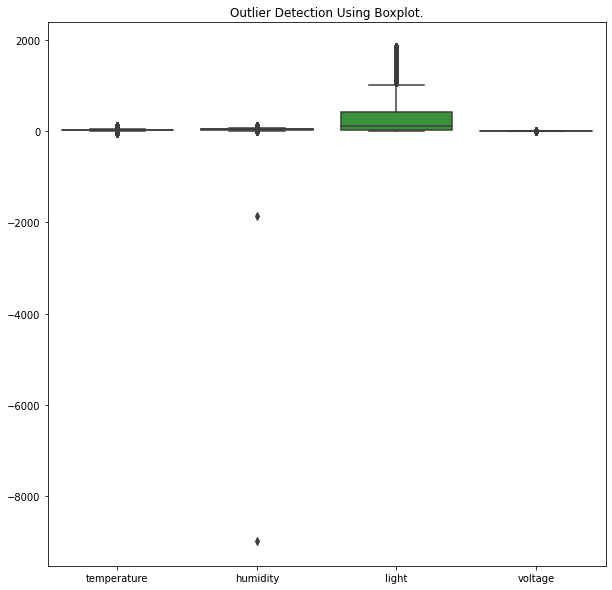

In [4]:
plt.figure(figsize =(10, 10))
plt.title("Outlier Detection Using Boxplot.")
sns.boxplot(data = x)